In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from lxml import html
import requests

%matplotlib inline

## Facebook Network Analysis 

In this notebook, I will analyse Facebook friendship network. The Data is ananomyzed and the only information given are:
Nodes: facebook users
Edges: friendship connections

However, there are a lot of information that can be explored, I will explore the following:

    1. Degree and closeness centrality 
    2. Betweenness
   

In [2]:
# loading the list of edge and weights
edges =  pd.read_csv('out.munmun_twitter_social', sep=" ", skiprows = 2)


# Converting to a list of tuples including the 'weight' attribute
tuples = [(x[0],x[1]) for x in edges.values]


# Making an empty graph.
cit=nx.DiGraph()

# Adding edges will automatically add nodes.
cit.add_edges_from(tuples)

In [9]:
G = nx.read_gml('power.gml', label=None )

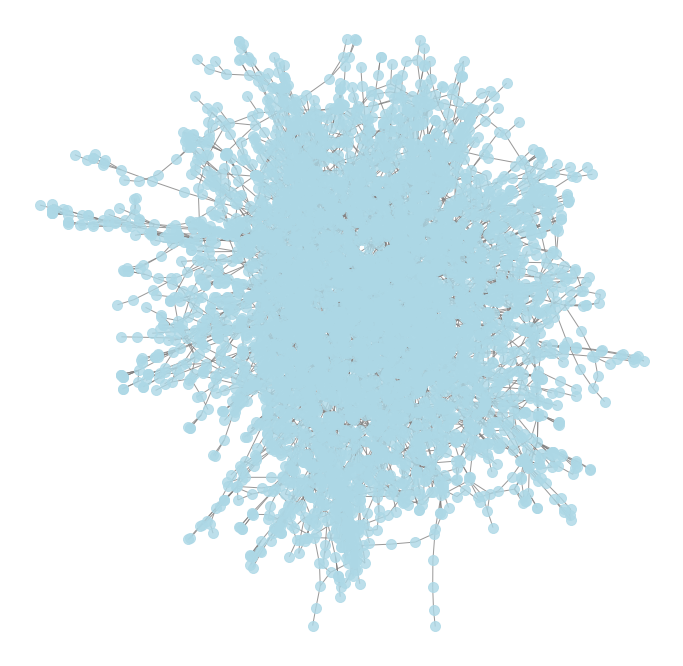

In [10]:
#Drawing the basic graph

plt.rcParams['figure.figsize']=[12,12]
nx.draw_networkx(G,
                 pos=nx.spring_layout(G), 
                 node_color='lightblue',
                 edge_color='gray',
                 node_size=100,
                 with_labels=False,
                 alpha=.8
                 )
plt.axis('off')
plt.show()

# First Impressions

The network presented above of a Power Grid shows One connected cluster with some nodes on the fringes. This is typical for a power grid in a city, All power stations are connected to make sure a constant flow of electricity in an undirected ways, or in other words, in all possible flows back and forth. 
To learn more about the network, Centrality measures can show interesting information, and so, the next step is to look into the different types of centrality measures. 

This graph has 4941 nodes and 6594 edges.
The median degree is 2.0 and the mean degree is 2.66909532483303.
The median degree centrality is 0.0004048582995951417 and the mean degree centrality is 0.0005403026973346214.
A Power Plant node with median degree is connected to 0.04047763610605141% of other Users.
There are 1 connected components within the graph.


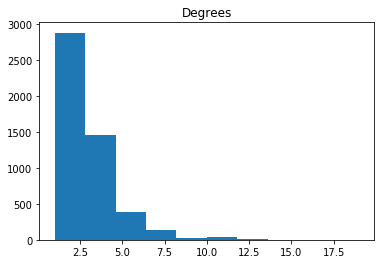

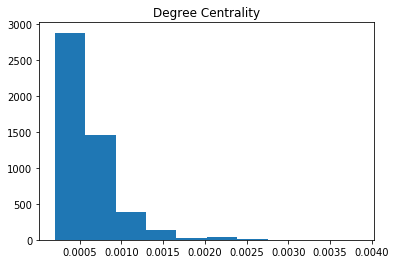

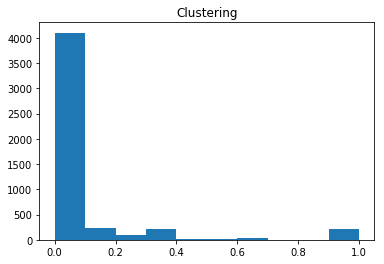

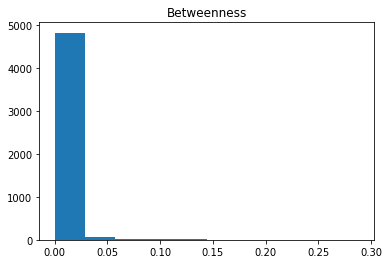

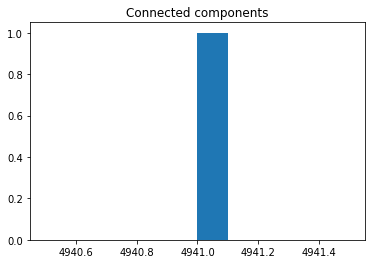

In [13]:
numberofnodes=G.number_of_nodes()
nodedegrees=list(dict(G.degree).values())
degreecent = list(dict(nx.degree_centrality(G)).values())
av_degree=np.mean(nodedegrees)
med_degree_cent=np.median(degreecent)
av_degree_cent=np.mean(degreecent)
med_degree=np.median(nodedegrees)
clustering=list(nx.clustering(G).values())
betweenness_cent=list(nx.betweenness_centrality(G).values())
componentsizes=[len(c) for c in sorted(
    nx.connected_components(G), key=len, reverse=True)]

print("This graph has {} nodes and {} edges.".format(
    G.number_of_nodes(),G.number_of_edges()))

print("The median degree is {} and the mean degree is {}.".format(med_degree,av_degree))

print("The median degree centrality is {} and the mean degree centrality is {}.".format(med_degree_cent,av_degree_cent))

print("A Power Plant node with median degree is connected to {}% of other Users.".format(
    (med_degree/numberofnodes)*100))


print("There are {} connected components within the graph.".format(
    nx.number_connected_components(G)))

plt.rcParams['figure.figsize']=[6,4]

plt.hist(nodedegrees)
plt.title('Degrees')
plt.show()

plt.hist(degreecent)
plt.title('Degree Centrality')
plt.show()


plt.hist(clustering)
plt.title('Clustering')
plt.show()

plt.hist(betweenness_cent)
plt.title('Betweenness')
plt.show()

plt.hist(componentsizes)
plt.title('Connected components')
plt.show()

In [14]:

sorted(betweenness_cent, reverse =True)[0:5]

The median degree centrality is 0.0004048582995951417 and the mean degree centrality is 0.0005403026973346214.


[0.28841562147939626,
 0.281698123316245,
 0.2796951897344535,
 0.27764988777849753,
 0.2673044750046778]

# Second Look

The network is connected where you you can travel from one node to any other node in the graph: As shown in the degree histogram, most nodes are not connected with an average of two edges mostly that connects the power grid with no overlap. The clustering histogram shows that there isnt that much clustering, which is also explained by the averaged degree, where nodes only complete the circuit with no real clustering. 
Although, this network is connected (we can travel from one node to any other node following edges), betweenness centrality scores are low overall. not many edges lie in the shortest path for many of the other nodes, 

Next we will look at the node attributes. 

In [16]:
# Pulling our node-level statistics together into a dataframe.
graph_stats=pd.DataFrame({'node':list(dict(G.degree()).keys()),
                          'degree':list(dict(G.degree()).values()),
                          'clustering':list(nx.clustering(G).values()),
                          'betweenness_cent':list(
                              nx.betweenness_centrality(G).values())
                         })

# Assigning each node to a component by number.
graph_stats['component']=None

# Sorting the components by size so that the largest component will be numbered 0.
components=sorted(nx.connected_components(G), key=len, reverse=True)
for i,component in enumerate(components):
    graph_stats.loc[graph_stats['node'].isin(list(component)),'component']=i
    
graph_stats.head()

node  degree  clustering  betweenness_cent  component
0     0       3         0.0          0.002515          0
1     1       4         0.0          0.005204          0
2     2       1         0.0          0.000000          0
3     3       1         0.0          0.000000          0
4     4       1         0.0          0.000000          0

In [17]:
graph_stats.head()

node  degree  clustering  betweenness_cent  component
0     0       3         0.0          0.002515          0
1     1       4         0.0          0.005204          0
2     2       1         0.0          0.000000          0
3     3       1         0.0          0.000000          0
4     4       1         0.0          0.000000          0

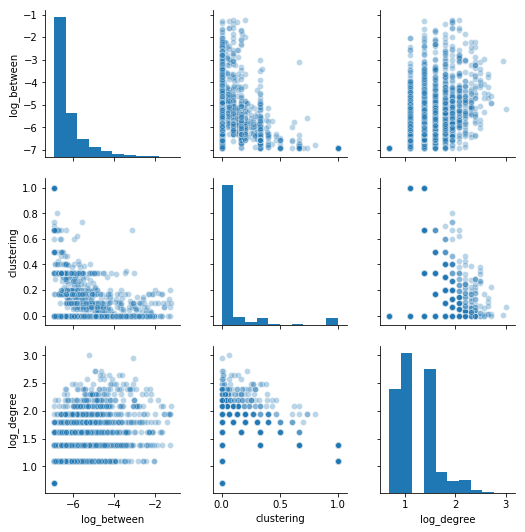

In [19]:
# Logging these two for easier relationship viewing.
graph_stats['log_between']=np.log(graph_stats['betweenness_cent']+.001)
graph_stats['log_degree']=np.log(graph_stats['degree']+1)

g = sns.pairplot(graph_stats,
                 vars=['log_between','clustering','log_degree'],
                 kind='scatter',
                plot_kws={'alpha':.3})
plt.show()

In [20]:
import operator

btwnCent = nx.betweenness_centrality(G, normalized = True , endpoints = False)
sorted(btwnCent.items(), key = operator.itemgetter(1), reverse = True)[0:5]

[(4164, 0.28841562147939626),
 (2543, 0.281698123316245),
 (1243, 0.2796951897344535),
 (4219, 0.27764988777849753),
 (2528, 0.2673044750046778)]

(-1.0364745331350478,
 1.0979192925039443,
 -1.0949020168996046,
 1.0851315639233778)

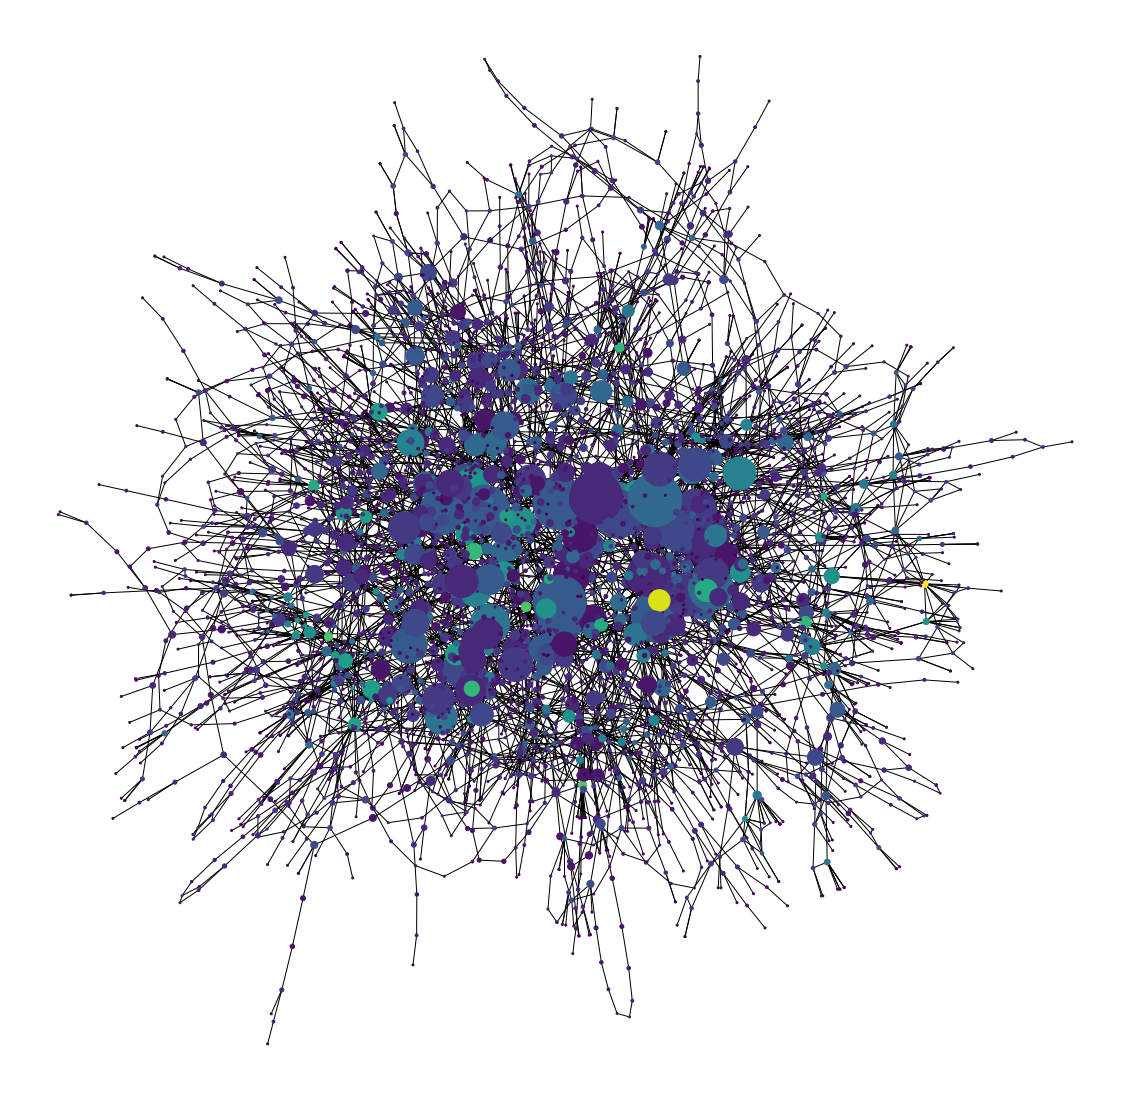

In [22]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

## Node characteristics

It appears that very high betweenness centrality is centered around the middle, connecting all the network together, these are essential stations. In order for us to asses their importance more accuratly, we need weighted edges with their output or input power as the weight. 
